In [73]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns; sns.set()
import utils
import numpy as np
from subprocess import call, check_output

# Experimento 1

Buscamos determinar, para knn solo, el valor optimo de k respecto a su performance (de acuerdo a distintas metricas). Fijamos k-fold en 5. Es decir que en cada iteracion habra un 80% de entrenamiento y un 20% de test

In [50]:
X = [i for i in range(1,272)] + [i for i in range(277,400, 5)]
for k in X:
    call(['../src/main', '-m', str(2), '-i', '../tests/catedra/testFullBig.in', '-o', '../tests/exp1/resultk{}'.format(k), '-knn-k', str(k), '-k-folds', str(5)])

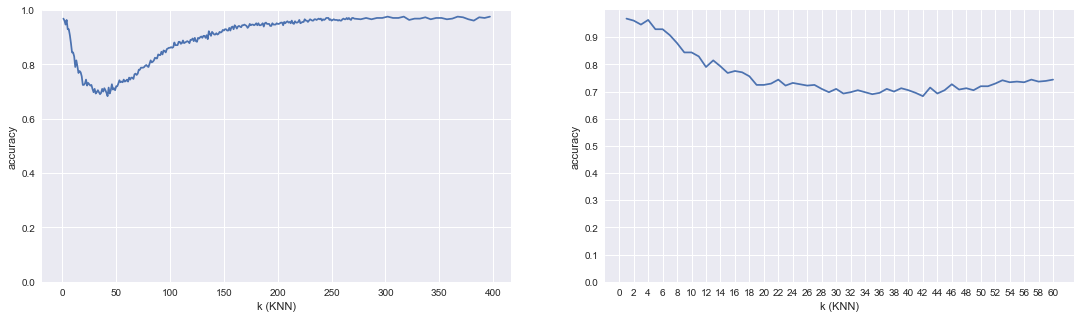

In [71]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.subplot(121)
plt.plot(X, [np.average(utils.loadStats('../tests/exp1/resultk{}'.format(k))['acccuracy']) for k in X])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')

plt.subplot(122)
plt.plot(X[:60], [np.average(utils.loadStats('../tests/exp1/resultk{}'.format(k))['acccuracy']) for k in X[:60]])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')
plt.xticks(range(0, 62,2))
plt.yticks(np.arange(0, 1, step=0.1))
plt.savefig('variandok-accuracy.png')
plt.show()

In [60]:
def getPrecisionReCall(k):
    matrices = utils.generateConfM('../tests/exp1/resultk{}.conf'.format(k))
    sumprecision = 0 
    sumrecall = 0 
    cant = 0
    for matriz in matrices:
        for posclass in range(41):
            sumprecision += matriz.precision(positive_class=posclass)
            sumrecall += matriz.recall(positive_class=posclass)
            cant += 1
    return (sumprecision/cant, sumrecall/cant)

precision = []
recall = []
for k in X:
    res = getPrecisionReCall(k)
    precision.append(res[0])
    recall.append(res[1]) 

41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 4

41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41
41 41


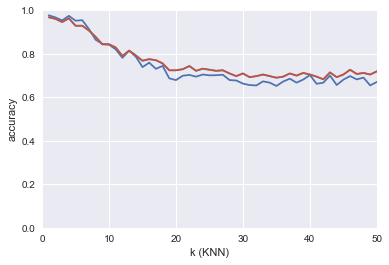

In [70]:
# fig = plt.gcf()
# fig.set_size_inches(18.5, 5)
# plt.subplot(121)
plt.plot(X, [precision[i] for i in range(len(X))])
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')
# plt.subplot(122)
plt.plot(X, [recall[i] for i in range(len(X))])
plt.xlim(0,50)
plt.ylabel('accuracy')
plt.xlabel('k (KNN)')
plt.plot(X, [np.average(utils.loadStats('../tests/exp1/resultk{}'.format(k))['acccuracy']) for k in X])

# plt.xticks(range(0, 62,2))
# plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

# Experimento 2

Medimos tiempos para distintos knn

In [86]:
time_mesurements = []
for k in range(1,400,5):
    print(k)
    result = check_output(['../src/experimentotiempos', '-m', str(0), '-i', '../tests/nuestros/ImagenesCaras80.train','-q','../tests/nuestros/ImagenesCaras80.test', '-o', '/dev/null', '-knn-k', str(k)])
    time_mesurements.append(float(result))
time_mesurements

1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186
191
196
201
206
211
216
221
226
231
236
241
246
251
256
261
266
271
276
281
286
291
296
301
306
311
316
321
326
331
336
341
346
351
356
361
366
371
376
381
386
391
396


[0.726936,
 0.731765,
 0.770639,
 0.749968,
 0.746694,
 0.756205,
 0.752114,
 0.76976,
 0.747119,
 0.761122,
 0.760931,
 0.745842,
 0.74786,
 0.755015,
 0.756149,
 0.756877,
 0.745247,
 0.755993,
 0.801642,
 0.74879,
 0.751521,
 0.786013,
 0.750309,
 0.760516,
 0.776377,
 0.769227,
 0.733705,
 0.730994,
 0.742229,
 0.752696,
 0.750914,
 0.753948,
 0.745781,
 0.751065,
 0.79183,
 0.732782,
 0.73539,
 0.732101,
 0.753997,
 0.785821,
 0.731142,
 0.738863,
 0.744306,
 0.745169,
 0.733152,
 0.74787,
 0.750027,
 0.745226,
 0.738156,
 0.733888,
 0.733319,
 0.73398,
 0.730804,
 0.733246,
 0.731665,
 0.74555,
 0.741197,
 0.735236,
 0.734959,
 0.739544,
 0.733139,
 0.762507,
 0.738495,
 0.735589,
 0.743263,
 0.75269,
 0.739217,
 0.733379,
 0.737932,
 0.746492,
 0.733103,
 0.752697,
 0.734707,
 0.749557,
 0.735874,
 0.733869,
 0.734776,
 0.74936,
 0.812532,
 0.732442]

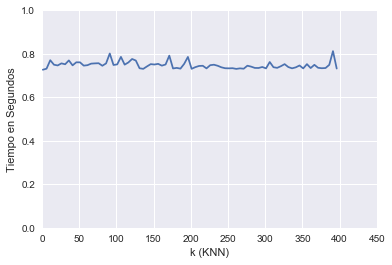

In [90]:
plt.plot(range(1,400,5), time_mesurements)
plt.ylabel('Tiempo en Segundos')
plt.xlabel('k (KNN)')
plt.xlim(0,450)
plt.ylim(0, 1)
# plt.figsize(15,5)
plt.savefig('variandok-time.png')
plt.show()